<a href="https://colab.research.google.com/github/ayucahyarani/Data-Mining/blob/main/Data_Understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mengimplementasikan Konsep Segmentasi Pelanggan untuk menilai pelanggan mal berdasarkan perilaku dan data pembelian mereka.**

#**Import Library**

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#**BUSINESS UNDERSTANDING**

##**Business Objective**

Segmentasi pelanggan di mal bertujuan untuk memahami cara pelanggan berbelanja di mal. Tujuan utamanya adalah untuk memahami pelanggan lebih baik, meningkatkan pengalaman berbelanja, dan meningkatkan keuntungan.

##**Assess Situation**

Di mal, pelanggan memiliki kebiasaan berbelanja yang beragam. Dengan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian, kita bisa mengetahui lebih banyak tentang preferensi mereka dan bagaimana kita bisa melayani mereka lebih baik.

##**Data Mining Goals**

- Mengelompokkan pelanggan berdasarkan pola pembelian dan perilaku mereka.
- Mengidentifikasi kelompok pelanggan yang paling berharga untuk mal.
- Mempelajari faktor-faktor yang memengaruhi tingkat pengeluaran pelanggan.

##**Project Plan**

- Mengumpulkan data tentang pelanggan seperti usia, jenis kelamin, dan pola pembelian.
- Menganalisis data untuk melihat pola dan tren dalam perilaku belanja pelanggan.
- Mengelompokkan pelanggan berdasarkan perilaku belanja mereka.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Dataset "Customer Segmentation" berasal dari Kaggle yang memberikan informasi tentang pelanggan di suatu mal. Dataset ini dikumpulkan oleh pengguna Kaggle dari mal tertentu untuk analisis segmentasi pelanggan.

Link dataset: https://www.kaggle.com/datasets/joebeachcapital/customer-segmentation

In [80]:
cs = pd.read_csv('https://raw.githubusercontent.com/ayucahyarani/Data-Mining/main/Mall_Customers.csv')
cs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##**Describe Data**

####Informasi Dasar

In [81]:
jumlah_baris, jumlah_kolom = cs.shape
print("Jumlah baris:", jumlah_baris)
print("Jumlah kolom:", jumlah_kolom)

Jumlah baris: 200
Jumlah kolom: 5


Dataset ini memiliki 200 baris dan 5 kolom. Artinya, terdapat 200 data pelanggan dalam dataset tersebut, yang dibagi ke dalam 5 kolom yang berbeda yang masing-masing menyimpan informasi seperti ID pelanggan, jenis kelamin, usia, pendapatan tahunan, dan skor pengeluaran.

####Informasi Lanjutan

In [82]:
print(cs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Dataset ini memiliki 5 kolom dengan informasi sebagai berikut:

1. **CustomerID**: Kolom ini menyimpan ID unik untuk setiap pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

2. **Gender**: Kolom ini menyimpan informasi tentang jenis kelamin pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah objek (`object`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

3. **Age**: Kolom ini menyimpan informasi tentang usia pelanggan. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

4. **Annual Income (k$)**: Kolom ini menyimpan informasi tentang pendapatan tahunan pelanggan dalam ribu dolar. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

5. **Spending Score (1-100)**: Kolom ini menyimpan informasi tentang skor pengeluaran pelanggan dalam skala 1-100. Jumlahnya adalah 200. Tipe data dari kolom ini adalah integer (`int64`). Semua nilai pada kolom ini tidak bernilai `null` (200 non-null count).

####Informasi Statistik Deskriptif

In [83]:
print(cs.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


Berikut adalah penjelasan statistik deskriptif untuk setiap kolom numerik dalam dataset:

**1. CustomerID:**

* **Mean:** Rata-rata ID pelanggan (100.500)
* **Std:** Standar deviasi ID pelanggan (57.879)
* **Min:** ID pelanggan terkecil (1)
* **25%:** 25% ID pelanggan terendah (50.750)
* **50%:** Median ID pelanggan (100.500)
* **75%:** 75% ID pelanggan terendah (150.250)
* **Max:** ID pelanggan terbesar (200.000)

**2. Age:**

* **Mean:** Rata-rata usia pelanggan (38.85 tahun)
* **Std:** Standar deviasi usia pelanggan (13.969 tahun)
* **Min:** Usia pelanggan termuda (18 tahun)
* **25%:** 25% pelanggan termuda (28.75 tahun)
* **50%:** Usia median pelanggan (36 tahun)
* **75%:** 75% pelanggan termuda (49 tahun)
* **Max:** Usia pelanggan tertua (70 tahun)

**3. Annual Income (k$)**:

* **Mean:** Rata-rata pendapatan tahunan pelanggan (60.560 dolar)
* **Std:** Standar deviasi pendapatan tahunan pelanggan (26.265 dolar)
* **Min:** Pendapatan tahunan terendah (15.000 dolar)
* **25%:** 25% pelanggan dengan pendapatan terendah (41.500 dolar)
* **50%:** Median pendapatan tahunan pelanggan (61.500 USD)
* **75%:** 75% pelanggan dengan pendapatan terendah (78.000 dolar)
* **Max:** Pendapatan tahunan tertinggi (137.000 dolar)

**4. Spending Score (1-100)**:

* **Mean:** Rata-rata skor pengeluaran pelanggan (50.20)
* **Std:** Standar deviasi skor pengeluaran pelanggan (25.824)
* **Min:** Skor pengeluaran terendah (1)
* **25%:** 25% pelanggan dengan skor pengeluaran terendah (34.75)
* **50%:** Median skor pengeluaran pelanggan (50)
* **75%:** 75% pelanggan dengan skor pengeluaran terendah (73)
* **Max:** Skor pengeluaran tertinggi (99)

##**Exploratory Data Analysis**

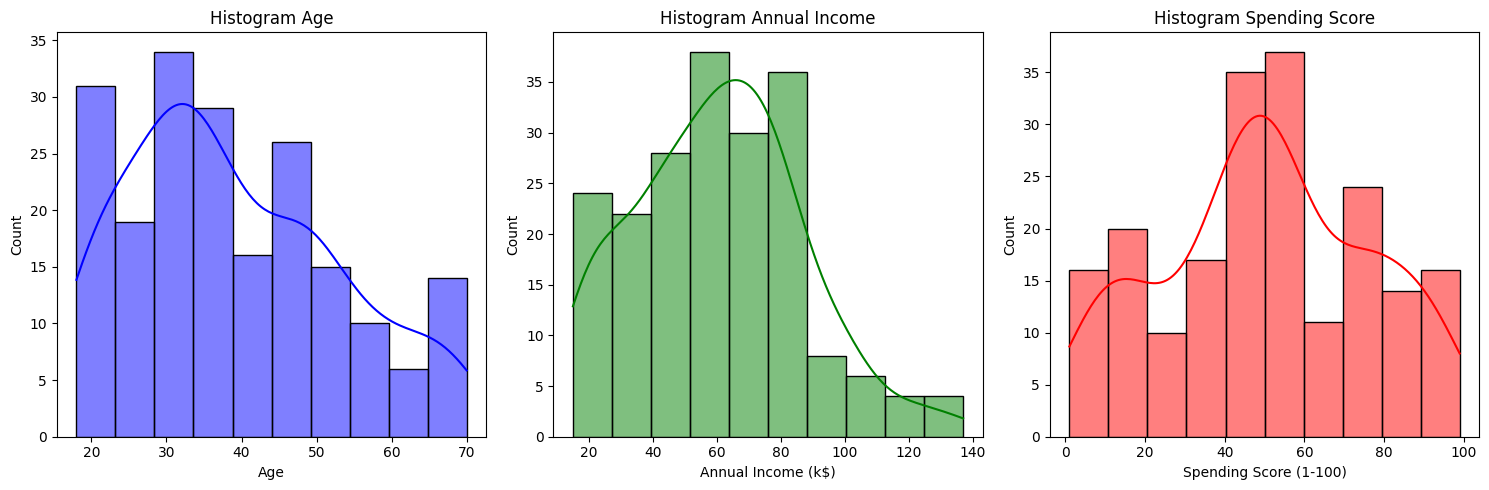

In [84]:
#Distribution Plots

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(cs['Age'], bins=10, kde=True, color='blue')
plt.title('Histogram Age')

plt.subplot(1, 3, 2)
sns.histplot(cs['Annual Income (k$)'], bins=10, kde=True, color='green')
plt.title('Histogram Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(cs['Spending Score (1-100)'], bins=10, kde=True, color='red')
plt.title('Histogram Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat tiga Distribution Plots yang menunjukkan:

- **Age**: Distribusi usia berbentuk miring kanan dengan mayoritas orang berada di usia 20-an dan 30-an. Jumlah orang berkurang seiring dengan bertambahnya usia.
- **Annual Income (k$)**: Distribusi pendapatan tahunan rata-rata berbentuk miring kanan dengan mayoritas orang memiliki pendapatan di kisaran 50.000 - 100.000 dolar per tahun. Ada beberapa orang dengan pendapatan yang sangat tinggi (di atas 140.000 dolar per tahun).
- **Spending Score (1-100)**: Distribusi skor pengeluaran terdistribusi secara normal dengan mayoritas orang memiliki skor di kisaran 40-60.

<ipython-input-85-b54b5cf43600>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')


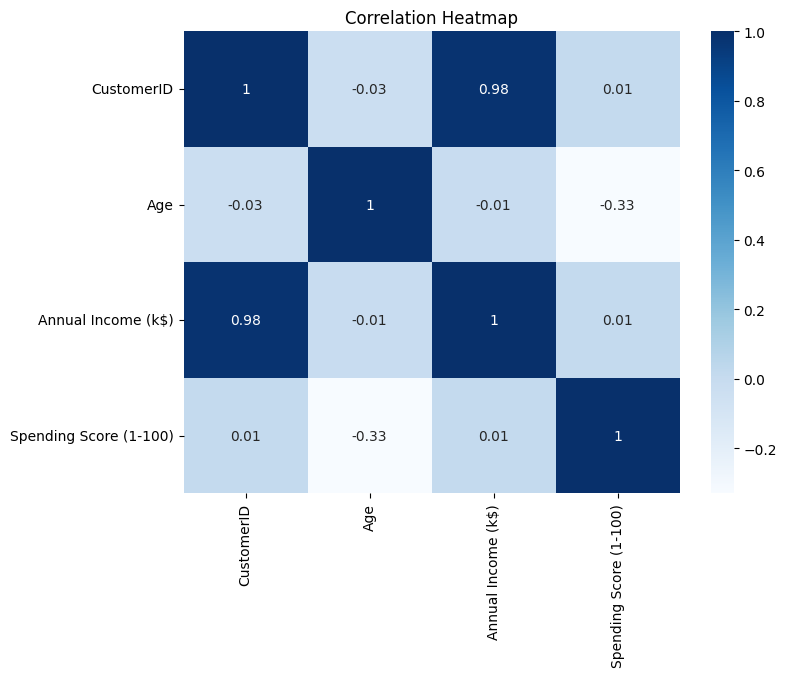

In [85]:
#Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(cs.corr().round(2), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

plt.show()

Berdasarkan gambar, terdapat Heatmap yang menunjukkan:

- **CustomerID**: Tidak memiliki korelasi yang kuat dengan variabel lain.
- **Age**: Memiliki korelasi negatif yang lemah dengan Spending Score (1-100). Artinya, semakin tua seseorang, semakin kecil kemungkinan mereka untuk menghabiskan banyak uang.
- **Annual Income (k$)**: Memiliki korelasi positif yang kuat dengan Spending Score (1-100). Artinya, semakin tinggi pendapatan seseorang, semakin besar kemungkinan mereka untuk menghabiskan banyak uang.

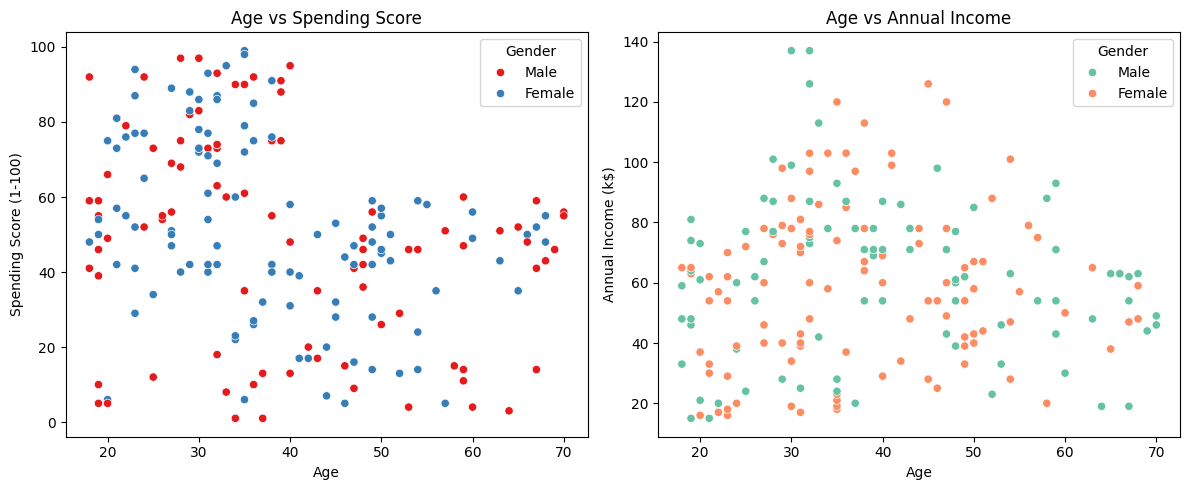

In [86]:
#Scatterplot

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=cs, x='Age', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title('Age vs Spending Score')

plt.subplot(1, 2, 2)
sns.scatterplot(data=cs, x='Age', y='Annual Income (k$)', hue='Gender', palette='Set2')
plt.title('Age vs Annual Income')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Scatterplot yang menunjukkan:

- **Age vs Spending Score**: Terdapat korelasi negatif yang lemah antara usia dan skor pengeluaran. Artinya, seiring bertambahnya usia, skor pengeluaran cenderung meningkat. Pola penyebaran data menunjukkan banyak variasi dalam skor pengeluaran untuk setiap kelompok usia.
- **Age vs Annual Income**: Terdapat korelasi positif yang kuat antara usia dan pendapatan tahunan rata-rata. Artinya, seiring bertambahnya usia, penghasilan tahunan cenderung meningkat secara signifikan. Pola penyebaran data menunjukkan variasi yang lebih kecil dalam penghasilan tahunan dibandingkan skor pengeluaran.

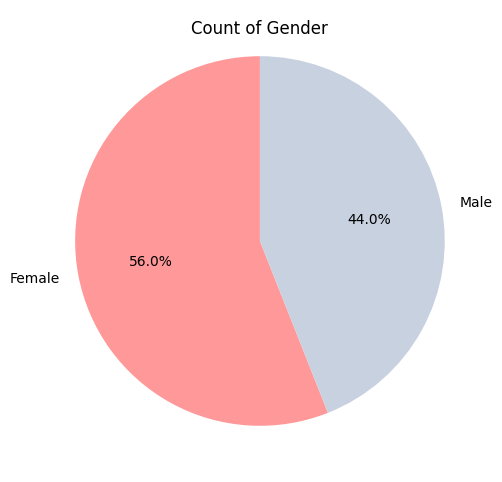

In [87]:
#Pie Chart

gender_counts = cs['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#c7d1e0'])
plt.title('Count of Gender', y=0.93)
plt.show()

Berdasarkan gambar, terdapat Pie Chart yang menunjukkan jumlah pelanggan terbanyak berdasarkan gender adalah perempuan, yaitu sebanyak 56%.

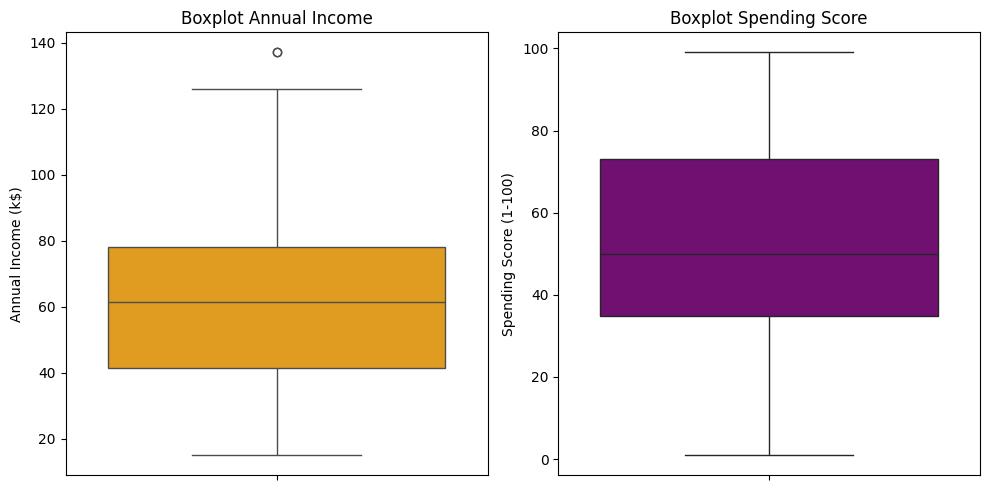

In [88]:
#Boxplot

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y='Annual Income (k$)', data=cs, color='orange')
plt.title('Boxplot Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y='Spending Score (1-100)', data=cs, color='purple')
plt.title('Boxplot Spending Score')

plt.tight_layout()
plt.show()

Berdasarkan gambar, terdapat dua Boxplot yang menunjukkan:

- **Annual Income**: Median pendapatan tahunan adalah sekitar 80.000 dolar dan sebagian besar pendapatan tahunan berada antara 60.000 dan 100.000 dolar.
- **Spending Score**: Median skor pengeluaran adalah sekitar 60 dan sebagian besar skor pengeluaran berada antara 40 dan 80.

Secara umum, pelanggan dalam mal ini memiliki pendapatan tahunan yang lebih tinggi daripada skor pengeluaran mereka.

##**Verify Data Quality**

####Missing Values

In [89]:
nama_kolom = cs.columns[cs.isnull().any()]
if nama_kolom.empty:
    print("Tidak ada nilai kosong pada dataset.")
else:
    print("Kolom dengan nilai kosong:", nama_kolom)

Tidak ada nilai kosong pada dataset.


Dalam dataset ini setiap kolom dan baris memiliki nilai yang terisi lengkap. Tidak ada bagian dari dataset yang kosong atau tidak memiliki nilai.

####Outliers Values

In [94]:
results = []

cols = cs.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = cs[col].quantile(0.25)
  q3 = cs[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = cs[(cs[col] < lower_bound) | (cs[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(cs))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_cs = pd.DataFrame(results)
results_cs.set_index('Kolom', inplace=True)
results_cs = results_cs.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_cs)

Kolom,Persentase Outliers
CustomerID,0.0
Age,0.0
Annual Income (k$),1.0
Spending Score (1-100),0.0


Berdasarkan kolom dan persentasi aotliers pada dataset ini, terlihat bahwa hanya kolom Annual Income yang memiliki outliers, dengan persentase sebesar 1.0. Artinya, terdapat sebagian kecil dari data pada kolom Annual Income yang berada di luar jangkauan nilai yang dianggap normal berdasarkan kuartil data. Sementara itu, kolom lainnya tidak memiliki outliers berdasarkan batasan yang ditentukan.

####Duplicated Values

In [91]:
result_data = []

for col in cs.columns:
    is_duplicated = 'Ya' if cs[col].duplicated().any() else 'Tidak'
    result_data.append({'Kolom': col, 'Duplikat': is_duplicated})

result_cs = pd.DataFrame(result_data)
print(result_cs)

                    Kolom Duplikat
0              CustomerID    Tidak
1                  Gender       Ya
2                     Age       Ya
3      Annual Income (k$)       Ya
4  Spending Score (1-100)       Ya


Berdasarkan kolom pada dataset ini, terlihat bahwa ada nilai duplikat pada kolom "Gender", "Age", "Annual Income (k$)", dan "Spending Score (1-100)". Yang berarti ada nilai yang sama muncul lebih dari sekali dalam setiap kolom yang disebutkan di atas. Sedangkan untuk kolom "CustomerID", tidak ada nilai yang sama yang muncul lebih dari sekali, yang berarti setiap ID pelanggan unik.

####Inconsistent Values / Noise (Optional)

In [92]:
for column in cs.columns:
    print(f"Column: {column}")
    unique_values_count = len(cs[column].unique())
    print(f"Jumlah Nilai Unik: {unique_values_count}")
    print()

Column: CustomerID
Jumlah Nilai Unik: 200

Column: Gender
Jumlah Nilai Unik: 2

Column: Age
Jumlah Nilai Unik: 51

Column: Annual Income (k$)
Jumlah Nilai Unik: 64

Column: Spending Score (1-100)
Jumlah Nilai Unik: 84



Berdasarkan analisis nilai inkonsisten / noise pada dataset ini menunjukkan:
- Kolom **CustomerID** memiliki nilai unik sebanyak 200, menunjukkan bahwa tidak ada duplikasi data.
- Kolom **Gender** memiliki nilai unik sebanyak 2, menunjukkan hanya ada dua jenis kelamin yang terdaftar (male dan female).
- Kolom **Age** memiliki nilai unik sebanyak 51, menunjukkan rentang usia yang cukup luas (dari 18 hingga 70 tahun) dengan 51 kemungkinan usia.
- Kolom **Annual Income (k$)** memiliki 64 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang pendapatan yang luas (dari 15.000 hingga 137.000 dolar) dengan 64 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.
- Kolom **Spending Score (1-100)** memiliki 84 nilai unik, menunjukkan kemungkinan adanya nilai inkonsisten / noise. Rentang skor yang luas (dari 1 hingga 99) dengan 84 kemungkinan nilai, menandakan kemungkinan adanya data yang tidak konsisten.